In [20]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append("../")
from calc_Tsys import TskySim, auto_data

# Trxr and Noise/Gain Parameters

In [21]:
hera_beam_file = '/home/shane/data/uv_beam_vivaldi.fits'

Tsky_sim = TskySim(Tsky_file = '/data4/shane/data/HERA_Tsky_vivaldi.npz', beam_file = hera_beam_file,
                  f_min=100.,f_max=200.)


In [3]:
Tsky_sim.build_model()

In [4]:
data_8536 = auto_data(data_dir='/data4/shane/data/2458536/', filestart='zen.*',
                         fileend='*HH.uvh5', autos_file='post_power_drop_autos.uvh5',f_min=100.,f_max=200.,
                         use_npz = True, npz_file='/data4/tcox/HERA_IDR2_analysis/IDR2_2458116_autos.npz')
data_8536.build_model(Tsky_sim)

In [6]:
data_8536.fit_data(calc_fit_err=True)

../calc_Tsys.py:252: RuntimeWarning: invalid value encountered in sqrt
  self.gains[(ant, pol)] = np.sqrt(Ae[poli] / 2761.3006 * self.fits[(ant, pol)][0])


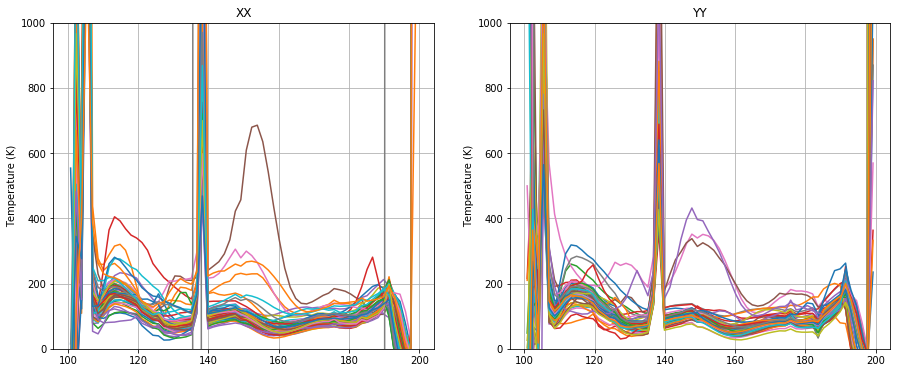

In [22]:
fig, axarr = plt.subplots(1, 2, figsize=(15, 6))

for ant, pol in data_8536.Trxr.keys():
    if pol == 'N':
        axarr[1].plot(data_8536.freqs, data_8536.Trxr[(ant,pol)],label=ant)
    if pol == 'E':
        axarr[0].plot(data_8536.freqs, data_8536.Trxr[(ant,pol)],label=ant)
        
axarr[1].set_title('YY')
axarr[0].set_title('XX')
axarr[0].set_ylim([0,1e3])
axarr[1].set_ylim([0,1e3])
axarr[0].set_ylabel('Temperature (K)')
axarr[1].set_ylabel('Temperature (K)')
axarr[0].grid()
axarr[1].grid()

plt.show()

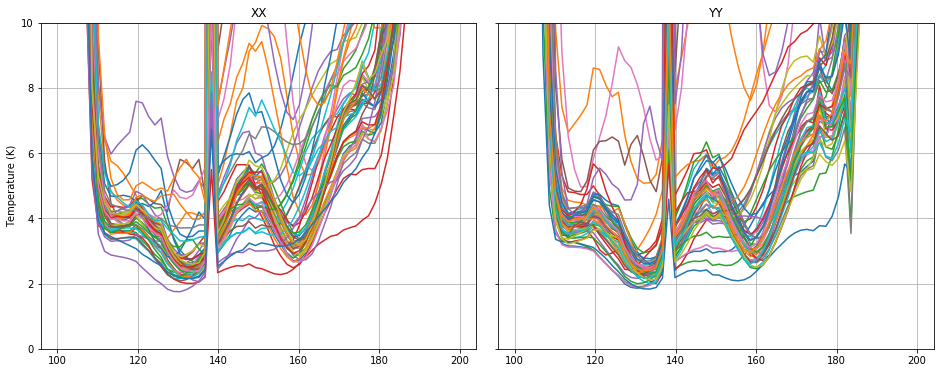

In [23]:
fig, axarr = plt.subplots(1, 2, sharey=True,figsize=(16, 6))

for ant, pol in data_8536.Trxr.keys():
    if pol == 'N':
        axarr[1].plot(data_8536.freqs, data_8536.Trxr_err[(ant,pol)],label=ant)
    if pol == 'E':
        axarr[0].plot(data_8536.freqs, data_8536.Trxr_err[(ant,pol)],label=ant)
        
axarr[1].set_title('YY')
axarr[0].set_title('XX')
axarr[0].set_ylim([0,10])
axarr[1].set_ylim([0,10])
axarr[0].set_ylabel('Temperature (K)')

axarr[0].grid()
axarr[1].grid()
plt.subplots_adjust(wspace=0.05)
plt.show()

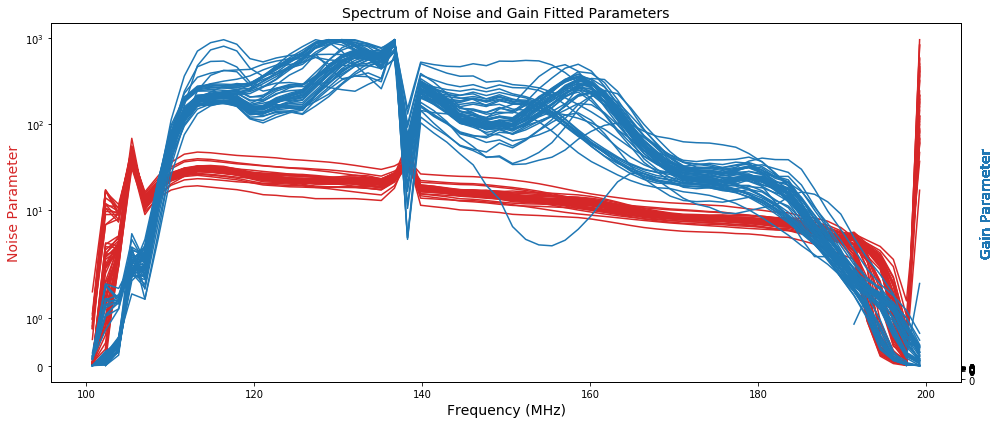

In [19]:

fig, ax1 = plt.subplots()

fig.set_figheight(6)
fig.set_figwidth(14)

for ant, pol in data_8536.Trxr.keys():
    
    if pol == 'E':
        color = 'tab:red'
        ax1.set_title('Spectrum of Noise and Gain Fitted Parameters',size=14)
        ax1.set_ylabel('Noise Parameter',size=14,color=color)
        ax1.set_xlabel('Frequency (MHz)',size = 14)
        ax1.plot(data_8536.freqs, (data_8536.Trxr[(ant, pol)]+data_8536.Tsky_mean[0,:])*data_8536.gains[(ant, pol)],label='antenna 0',color = color)
        ax1.tick_params(axis='y')
        ax1.set_yscale('symlog')
        
        ax2 = ax1.twinx()

        color = 'tab:blue'
        ax2.set_ylabel('Gain Parameter',size = 14,color=color)
        ax2.plot(data_8536.freqs, data_8536.gains[(ant, pol)],label='antenna 0',color = color)
        ax2.tick_params(axis='y')
        ax2.set_yscale('symlog')

fig.tight_layout()
plt.show()



# Attempting to Plot in Temperature Units

In [61]:

uv_diff = UVData()

file_list = list(np.sort(glob.glob('2458536/zen.2458536.*.diff.uvh5')))


In [62]:
uv_diff.read(file_list)

In [75]:

uv_temp = uv_diff.get_data(0,0,'xx')[:,26:] / data_8536.gains[(0,'E')]


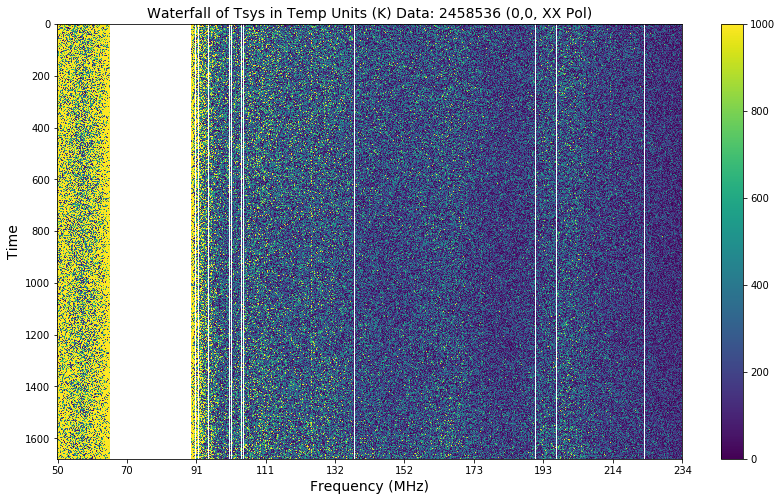

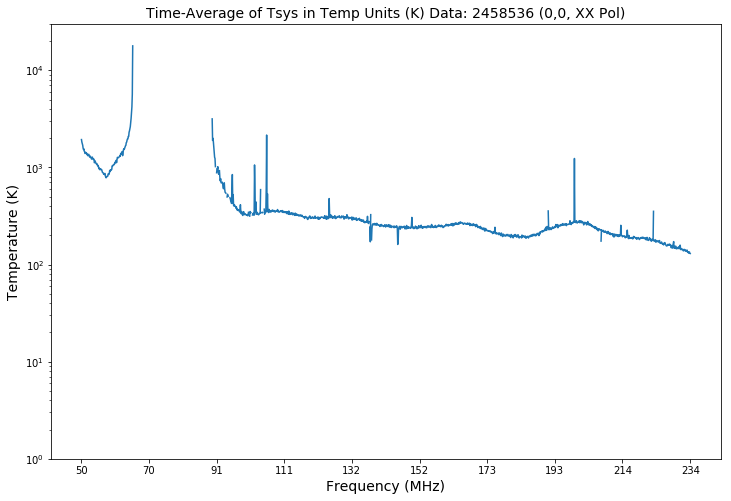

In [123]:

plt.figure(figsize=(14,8))
plt.imshow(np.abs(uv_temp), aspect='auto', vmax=1e3)
plt.title('Waterfall of Tsys in Temp Units (K) Data: 2458536 (0,0, XX Pol)',size=14)
plt.ylabel('Time',size=14)
plt.xlabel('Frequency (MHz)',size=14)
x_ticks = np.linspace(0,1509,num=10,dtype=int)
plt.xticks(x_ticks,(np.around(data_8536.uv.freq_array[0,x_ticks]*1e-6)).astype(int))
plt.colorbar()
plt.show()

plt.figure(figsize=(12,8))
plt.plot(np.mean(np.abs(uv_temp),axis=0))
plt.title('Time-Average of Tsys in Temp Units (K) Data: 2458536 (0,0, XX Pol)',size=14)
plt.ylabel('Temperature (K)',size=14)
plt.xlabel('Frequency (MHz)',size=14)
x_ticks = np.linspace(0,1509,num=10,dtype=int)
plt.xticks(x_ticks,(np.around(data_8536.uv.freq_array[0,x_ticks]*1e-6)).astype(int))
plt.yscale('log')
plt.ylim([1e0,3e4])
plt.show()
